In [43]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.early_classification import NonMyopicEarlyClassifier
from tslearn.datasets import UCR_UEA_datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [44]:
def plot_partial(time_series, t, y_true=0, y_pred=0, color="k"):
    plt.plot(time_series[:t+1].ravel(), color=color, linewidth=1.5)
    plt.plot(numpy.arange(t+1, time_series.shape[0]),
             time_series[t+1:].ravel(),
             linestyle="dashed", color=color, linewidth=1.5)
    plt.axvline(x=t, color=color, linewidth=1.5)
    plt.text(x=t - 20, y=time_series.max() - .25, s="Prediction time")
    plt.title(
        "Sample of class {} predicted as class {}".format(y_true, y_pred)
    )
    plt.xlim(0, time_series.shape[0] - 1)

In [159]:
data_path = '..\data\processed\\cluster_2017_2018[DataMining].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.sample(5)

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,cluster
ts,,,,,,,,,,,,,,,,,,,,,
2017-07-16,17.139179,29.544708,18.968230,16.471106,16.697120,16.610776,14.350608,14.892638,18.517521,21.004439,...,23.134461,23.916863,22.970222,21.668813,21.060004,19.516966,18.515331,17.461037,16.808503,0
2017-07-07,17.414408,29.405857,17.998105,14.945857,14.932501,15.148224,14.057947,14.804839,16.208226,18.168822,...,21.400168,21.820297,20.091188,18.316610,17.345051,16.388210,15.990443,15.895767,16.074240,0
2017-01-15,28.639613,30.705794,27.967549,27.355673,26.572749,26.325705,28.685749,31.567574,33.370448,34.665648,...,36.538480,37.033709,35.006583,33.729511,32.268032,30.591598,30.165544,29.478401,28.343463,2
2017-02-01,29.231893,29.170697,29.102708,28.981157,28.680215,28.408843,28.406606,28.404369,28.402132,28.399894,...,28.386465,28.384226,28.381986,28.379747,28.377507,28.375268,28.373028,28.370788,28.368547,1
2018-01-26,26.255929,25.112612,25.433285,25.688353,25.404697,25.230456,26.014486,27.561767,28.420263,30.082443,...,34.015933,34.624571,33.615528,31.009186,29.501625,28.414850,28.394729,27.880825,27.415112,2


In [160]:
X = df_data.iloc[:,:-1].values
y = df_data.iloc[:,-1].values

<IPython.core.display.Javascript object>


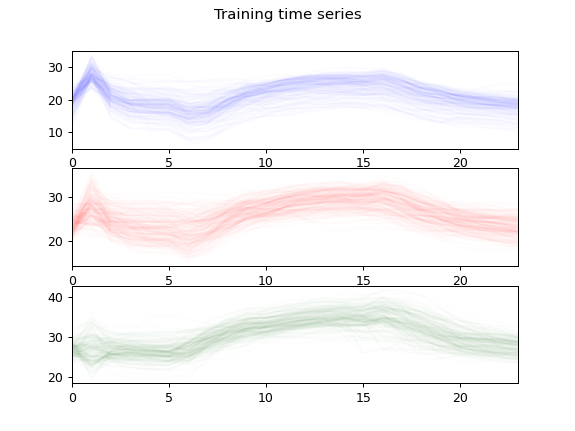

In [283]:
#X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("ECG200")
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale time series
#X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
#X_test = TimeSeriesScalerMeanVariance().fit_transform(X_test)

#sc1 = MinMaxScaler()
#X_train = sc1.fit_transform(X_train)
#sc2 = MinMaxScaler()
#X_test = sc2.fit_transform(X_test)
size = X_train.shape[1]
n_classes = len(set(y_train))

color_list = ['blue','red','green','orange','yellow','black','purple','skyblue','cyan','brown']
plt.figure()
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    for ts in X_train[y_train == cl]:
        plt.plot(ts.ravel(), color=color_list[cl], alpha=.01)
    plt.xlim(0, size - 1)
plt.suptitle("Training time series")
plt.show()

In [284]:
sc1 = MinMaxScaler()
X_train = sc1.fit_transform(X_train)
sc2 = MinMaxScaler()
X_test = sc2.fit_transform(X_test)

C:\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 489 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 489 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


early_classification_cost:  0.3031492842535788


C:\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 241 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Anaconda3\lib\site-packages\tslearn\utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 241 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


Correct classification rate: 0.6265560165975104


<IPython.core.display.Javascript object>


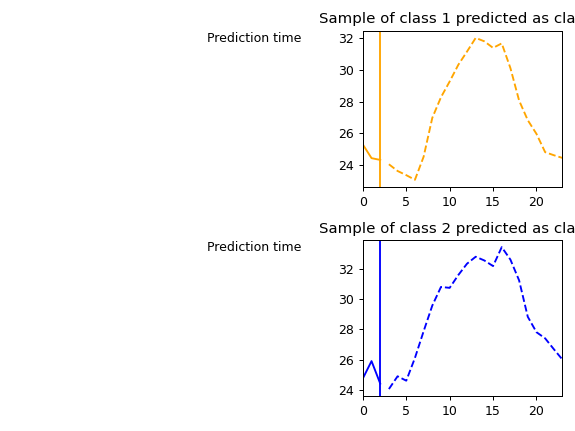

In [285]:
early_clf = NonMyopicEarlyClassifier(n_clusters=3,
                                     cost_time_parameter=0.08)
# 0.01 - 0.1

early_clf.fit(X_train, y_train)

print('early_classification_cost: ',early_clf.early_classification_cost(X_train, y_train))

preds, times = early_clf.predict_class_and_earliness(X_test)

print("Correct classification rate:", early_clf.score(X_test, y_test))

X_test = sc2.inverse_transform(X_test)

plt.figure()
plt.subplot(2, 1, 1)
ts_idx = 0
t = times[ts_idx]
plot_partial(X_test[ts_idx], t, y_test[ts_idx], preds[ts_idx], color="orange")


plt.subplot(2, 1, 2)
ts_idx = 9
t = times[ts_idx]
plot_partial(X_test[ts_idx], t, y_test[ts_idx], preds[ts_idx], color="blue")
plt.tight_layout()
plt.show()

In [286]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
confusion_matrix(y_test, preds)

array([[60,  1,  0],
       [29, 47, 10],
       [ 4, 46, 44]], dtype=int64)